In [1]:
# Run this cell to set up packages for lecture.
from lec09_imports import *

# Lecture 9 – Distributions and Sampling

## DSC 10, Summer 2025

### Agenda

- Probability distributions vs. empirical distributions.
- Populations and samples.
- Parameters and statistics.

🚨 We're moving into the second half of the course, which is more conceptual than the first. Coming to lecture and asking questions is advised!

## Probability distributions vs. empirical distributions

### Probability distributions

- Consider a random quantity with various possible values, each of which has some associated probability.

- A **probability distribution** is a description of:
    - All possible values of the quantity.
    - The **theoretical** probability of each value.

### Example: Probability distribution of a die roll 🎲

The distribution is **uniform**, meaning that each outcome has the same chance of occurring.

In [2]:
die_faces = np.arange(1, 7, 1)
die = bpd.DataFrame().assign(face=die_faces)
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


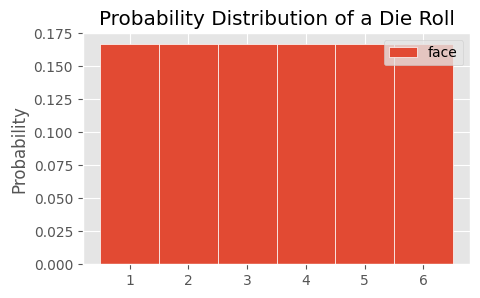

In [3]:
bins = np.arange(0.5, 6.6, 1)

# Note that you can add titles to your visualizations, like this!
die.plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
         title='Probability Distribution of a Die Roll',
         figsize=(5, 3))

# You can also set the y-axis label with plt.ylabel.
plt.ylabel('Probability');

### Empirical distributions

- Unlike probability distributions, which are theoretical, **empirical distributions are based on observations**.

- Commonly, these observations are of repetitions of an experiment.

- An **empirical distribution** describes:
    - All observed values.
    - The proportion of experiments in which each value occurred.

- Unlike probability distributions, empirical distributions represent what actually happened in practice. 

### Example: Empirical distribution of a die roll 🎲
- Let's simulate a roll by using `np.random.choice`.
- To simulate the rolling of a die, we must sample **with** replacement.
    - If we roll a 4, we can roll a 4 again.

In [4]:
num_rolls = 25
many_rolls = np.random.choice(die_faces, num_rolls)
many_rolls

array([1, 4, 3, ..., 2, 3, 4])

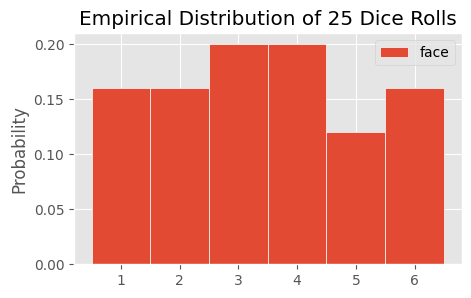

In [5]:
(bpd.DataFrame()
 .assign(face=many_rolls) 
 .plot(kind='hist', y='face', bins=bins, density=True, ec='w',
       title=f'Empirical Distribution of {num_rolls} Dice Rolls',
       figsize=(5, 3))
)
plt.ylabel('Probability');

### Many die rolls 🎲

What happens as we increase the number of rolls?

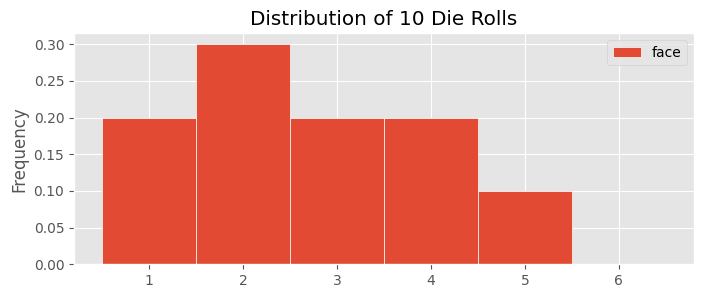

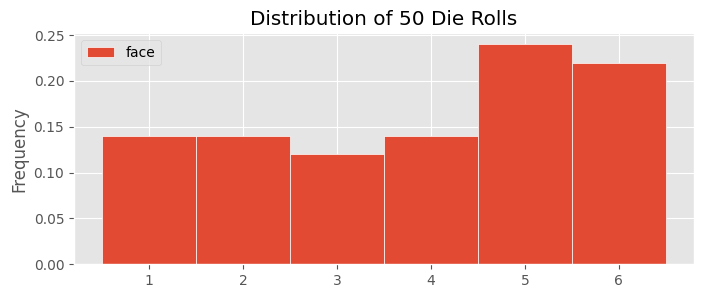

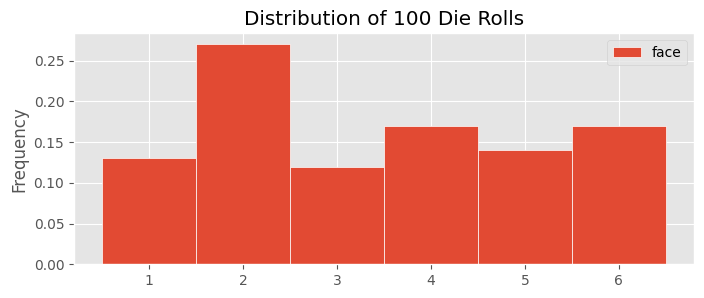

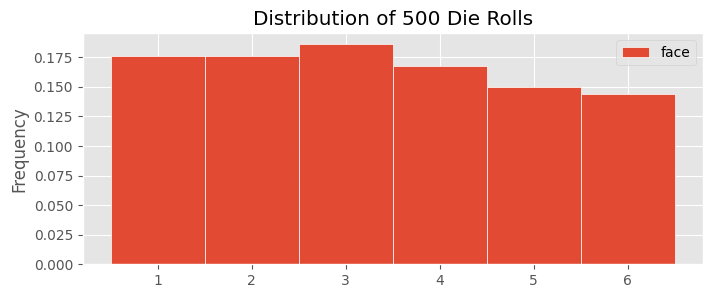

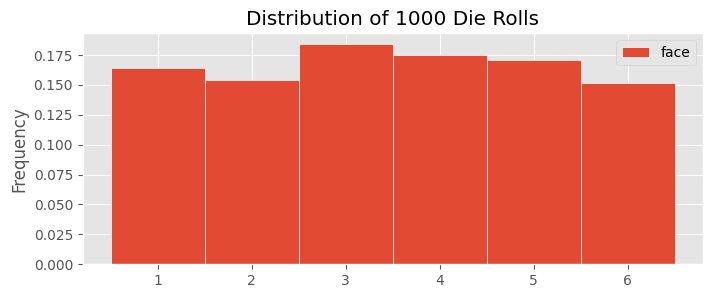

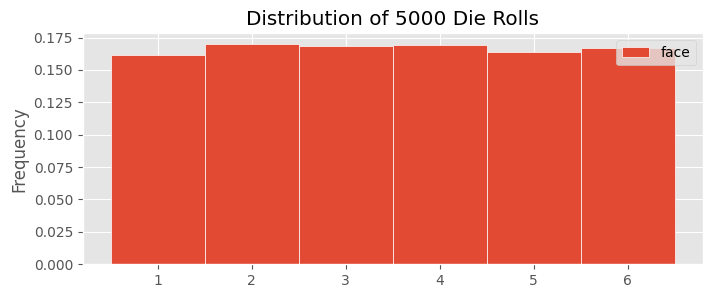

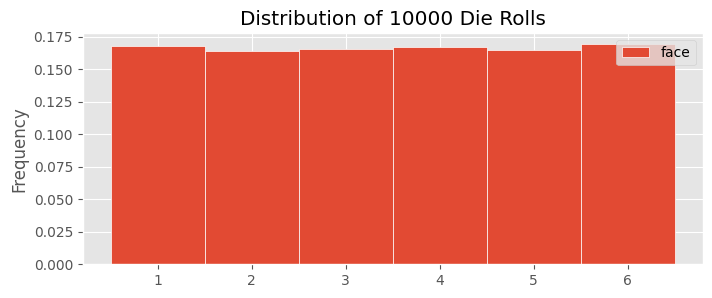

In [6]:
for num_rolls in [10, 50, 100, 500, 1000, 5000, 10000]:
    # Don't worry about how .sample works just yet – we'll cover it shortly.
    (die.sample(n=num_rolls, replace=True)
     .plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
           title=f'Distribution of {num_rolls} Die Rolls',
           figsize=(8, 3))
    )

### Why does this happen? ⚖️

The **law of large numbers** states that if a chance experiment is repeated 
- many times,
- independently, and
- under the same conditions,

 then the **proportion** of times that an event occurs gets closer and closer to the **theoretical probability** of that event.

- For example, as you roll a die repeatedly, the proportion of times you roll a 5 gets closer to $\frac{1}{6}$.

- The law of large numbers is **why** we can use simulations to approximate probability distributions!

## Sampling

### Populations and samples

- A **population** is the complete group of people, objects, or events that we want to learn something about.

- It's often infeasible to collect information about every member of a population.

- Instead, we can collect a **sample**, which is a subset of the population.

- **Goal**: Estimate the distribution of some numerical variable in the population, using only a sample.
    - For example, suppose we want to know the height of every single UCSD student.
    - It's too hard to collect this information for every single UCSD student – we can't find the **population distribution**.
    - Instead, we can collect data from a subset of UCSD students, to form a **sample distribution**.

### Sampling strategies

- **Question**: How do we collect a good sample, so that the sample distribution closely resembles the population distribution?

- **Bad idea ❌**: Survey whoever you can get ahold of (e.g. internet survey, people in line at Panda Express at PC).
   - Such a sample is known as a convenience sample.
   - Convenience samples often contain hidden sources of **bias**.

- **Good idea ✔️**: Select individuals at random. 

### Simple random sample

A **simple random sample (SRS)** is a sample drawn **uniformly** at random **without replacement**.
   - "Uniformly" means every individual has the same chance of being selected.
   - "Without replacement" means we won't pick the same individual more than once.

### Sampling from a list or array

To perform an SRS from a list or array `options`, we use `np.random.choice(options, n, replace=False)`.

In [7]:
colleges = np.array(['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh', 'Eighth'])

# Simple random sample of 3 colleges.
np.random.choice(colleges, 3, replace=False)

array(['Earl Warren', 'John Muir', 'Eighth'], dtype='<U17')

If we use `replace=True`, then we're sampling uniformly at random with replacement – there's no simpler term for this.

### Example: Distribution of flight delays ✈️

`united_full` contains information about all United flights leaving SFO between 6/1/15 and 8/31/15.

For this lecture, treat this dataset as our **population**.

In [8]:
united_full = bpd.read_csv('data/united_summer2015.csv')
united_full

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
...,...,...,...,...
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1
13824,8/31/15,2013,EWR,-2


### Sampling rows from a DataFrame

If we want to sample rows from a DataFrame, we can use the `.sample` method on a DataFrame. That is,

```py
df.sample(n)
```

returns a random subset of `n` rows of `df`, drawn **without replacement** (i.e. the default is `replace=False`, unlike `np.random.choice`).

In [9]:
# 5 flights, chosen randomly without replacement.
united_full.sample(5)

,Date,Flight Number,Destination,Delay
10404,8/8/15,1920,IAD,-3
2779,6/19/15,1076,BOS,-1
5270,7/6/15,1523,SEA,16
7057,7/18/15,276,EWR,-2
13784,8/31/15,1676,ORD,32


In [10]:
# 5 flights, chosen randomly with replacement.
united_full.sample(5, replace=True)

,Date,Flight Number,Destination,Delay
10007,8/6/15,704,JFK,7
12784,8/24/15,1689,IAD,-4
10792,8/11/15,1038,LAS,75
9378,8/2/15,887,LAX,19
12628,8/23/15,1601,LAS,-4


**Note**: The probability of seeing the same row multiple times when sampling with replacement is quite low, since our sample size (5) is small relative to the size of the population (13825).

### The effect of sample size

- The law of large numbers states that when we repeat a chance experiment more and more times, the empirical distribution will look more and more like the true probability distribution.

- **Similarly, if we take a large simple random sample, then the sample distribution is likely to be a good approximation of the true population distribution.**

### Population distribution of flight delays ✈️

We only need the `'Delay'`s, so let's select just that column.

In [11]:
united = united_full.get(['Delay'])
united

,Delay
0,257
1,28
2,-3
...,...
13822,3
13823,-1
13824,-2


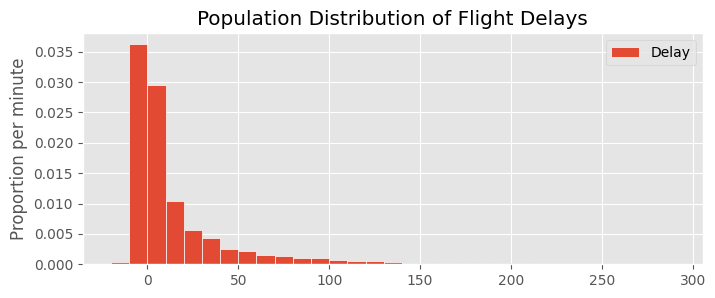

In [12]:
bins = np.arange(-20, 300, 10)
united.plot(kind='hist', y='Delay', bins=bins, density=True, ec='w', 
            title='Population Distribution of Flight Delays', figsize=(8, 3))
plt.ylabel('Proportion per minute');

Note that this distribution is **fixed** – nothing about it is random.

### Sample distribution of flight delays ✈️

- The 13825 flight delays in `united` constitute our population.
- Normally, we won't have access to the entire population.
- To replicate a real-world scenario, we will sample from `united` **without replacement**.

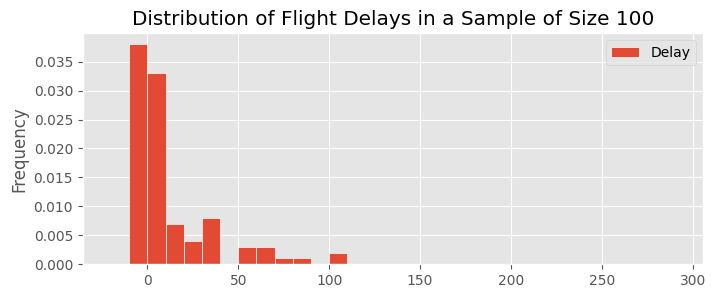

In [13]:
sample_size = 100 # Change this and see what happens!
(united
 .sample(sample_size)
 .plot(kind='hist', y='Delay', bins=bins, density=True, ec='w',
       title=f'Distribution of Flight Delays in a Sample of Size {sample_size}',
       figsize=(8, 3))
);

Note that as we increase `sample_size`, the sample distribution of delays looks more and more like the true population distribution of delays.

## Parameters and statistics

### Terminology

- **Statistical inference** is the practice of making conclusions about a population, using data from a random sample.

- **Parameter**: A number associated with the population.
    - Example: The population mean.

- **Statistic**: A number calculated from the sample.
    - Example: The sample mean.

- A statistic can be used as an **estimate** for a parameter.

_To remember: **p**arameter and **p**opulation both start with p, **s**tatistic and **s**ample both start with s._

### Mean flight delay ✈️

**Question**: What was the average delay of _all_ United flights out of SFO in Summer 2015? 🤔

- We'd love to know the **mean delay in the population (parameter)**, but in practice we'll only have a **sample**.

- How does the **mean delay in the sample (statistic)** compare to the **mean delay in the population (parameter)**?

### Population mean

The **population mean** is a **parameter**.

In [14]:
# Calculate the mean of the population.
united_mean = united.get('Delay').mean()
united_mean

16.658155515370705

This number (like the population distribution) is fixed, and is not random. In reality, we would not be able to see this number – we can only see it right now because this is a demonstration for teaching!

### Sample mean

The **sample mean** is a **statistic**. Since it depends on our sample, which was drawn at random, the sample mean is **also random**.

In [15]:
# Size 100.
united.sample(100).get('Delay').mean()

17.18

- Each time we run the cell above, we are:
    - Collecting a new sample of size 100 from the population, and
    - Computing the sample mean.
- We see a slightly different value on each run of the cell.
    - Sometimes, the sample mean is close to the population mean.
    - Sometimes, it's far away from the population mean.

### The effect of sample size

What if we choose a larger sample size?

In [16]:
# Size 1000.
united.sample(1000).get('Delay').mean()

18.38

- Each time we run the above cell, the result is still slightly different.
- However, the results seem to be much closer together – and much closer to the true population mean – than when we used a sample size of 100.
- **In general**, statistics computed on **larger** samples tend to be **better** estimates of population parameters than statistics computed on smaller samples.

**Smaller samples**:<center><img src='images/bullseye-high.png' width=300></center>

**Larger samples**:<center><img src='images/bullseye-low.png' width=300></center>

### Probability distribution of a statistic

- The value of a statistic, e.g. the sample mean, is random, because it depends on a random sample.

- Like other random quantities, we can study the "probability distribution" of the statistic (also known as its "sampling distribution").
    - This describes all possible values of the statistic and all the corresponding probabilities.
    - Why? **We want to know how different our statistic _could have_ been, had we collected a different sample.**

- Unfortunately, this can be hard to calculate exactly.
    - Option 1: Do the math by hand.
    - Option 2: Generate **all** possible samples and calculate the statistic on each sample.

- So, we'll instead use a simulation to approximate the distribution of the sample statistic.
    - We'll need to generate **a lot of** possible samples and calculate the statistic on each sample.

### Empirical distribution of a statistic

- The empirical distribution of a statistic is based on simulated values of the statistic. It describes:    
    - All observed values of the statistic.
    - The proportion of samples in which each value occurred.

- The empirical distribution of a statistic can be a good approximation to the probability distribution of the statistic, **if the number of repetitions in the simulation is large**.

### Distribution of sample means

- To understand how different the sample mean can be in different samples, we'll:
    - Repeatedly draw many samples.
    - Record the mean of each.
    - Draw a histogram of these values.

- The animation below visualizes the process of repeatedly sampling 1000 flights and computing the mean flight delay. 

In [17]:
%%capture
anim, anim_means = sampling_animation(united, 1000);

In [18]:
HTML(anim.to_jshtml())

### What's the point?

- In practice, we will only be able to collect one sample and calculate one statistic.
    - Sometimes, that sample will be very representative of the population, and the statistic will be very close to the parameter we are trying to estimate.
    - Other times, that sample will not be as representative of the population, and the statistic will not be very close to the parameter we are trying to estimate.

- The empirical distribution of the sample mean helps us answer the question "**what would the sample mean have looked like if we drew a different sample?**"

### Does sample size matter?

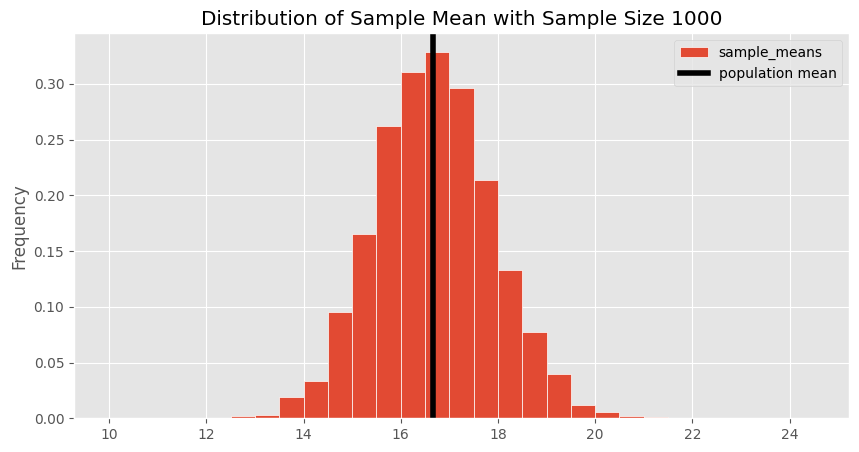

In [19]:
# Sample one thousand flights, two thousand times.
sample_size = 1000
repetitions = 2000
sample_means = np.array([])

for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

bpd.DataFrame().assign(sample_means=sample_means) \
               .plot(kind='hist', bins=np.arange(10, 25, 0.5), density=True, ec='w',
                     title=f'Distribution of Sample Mean with Sample Size {sample_size}',
                     figsize=(10, 5));
    
plt.axvline(x=united_mean, c='black', linewidth=4, label='population mean')
plt.legend();

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

We just sampled **one thousand flights**, two thousand times. If we now sample **one hundred flights**, two thousand times, how will the histogram change?

- A.  Narrower  
- B.  Wider  
- C.  Shifted left  
- D.  Shifted right  
- E.  Unchanged

### How we sample matters!

* So far, we've taken large **simple random samples** from the full population.
    * Simple random samples are taken without replacement.
    * If the population is large enough, then it doesn't really matter if we sample with or without replacement.

* The sample mean, for samples like this, is a good approximation of the population mean.

* But this is not always the case if we sample differently.

### In summary:

- The **probability distribution** of a random quantity describes the values it takes on along with the probability of each value occurring.
- An **empirical distribution** describes the values and frequencies of the results of a random experiment.
    - With more trials of an experiment, the empirical distribution gets closer to the probability distribution.
- A **population distribution** describes the values and frequencies of some characteristic of a population.
- A **sample distribution** describes the values and frequencies of some characteristic of a sample, which is a subset of a population.
    - When we take a simple random sample, as we increase our sample size, the sample distribution gets closer and closer to the population distribution.
- A **parameter** is a number associated with a **population**, and a **statistic** is a number associated with a **sample**.
- We can use statistics calculated on a random samples to **estimate** population parameters.
    - For example, to estimate the mean of a population, we can calculate the mean of the sample.
    - Larger samples tend to lead to better estimates.

### But how do balance needing large samples with the challenges associated with collecting a very large sample? 


## Bootstrapping!

### Example: City of San Diego employee salary data
All of San Diego city employee data is available to the public! Lets read in all the data up until 2023. 

In [20]:
population = bpd.read_csv('data/2023_salaries.csv')
population

,Year,EmployerType,EmployerName,DepartmentOrSubdivision,...,EmployerCounty,SpecialDistrictActivities,IncludesUnfundedLiability,SpecialDistrictType
0,2023,City,San Diego,Police,...,San Diego,NaN,False,NaN
1,2023,City,San Diego,Police,...,San Diego,NaN,False,NaN
2,2023,City,San Diego,Police,...,San Diego,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...
13885,2023,City,San Diego,Transportation,...,San Diego,NaN,False,NaN
13886,2023,City,San Diego,Police,...,San Diego,NaN,False,NaN
13887,2023,City,San Diego,Public Utilities,...,San Diego,NaN,False,NaN


When you load in a dataset that has so many columns that you can't see them all, it's a good idea to look at the column names.

In [21]:
population.columns

Index(['Year', 'EmployerType', 'EmployerName', 'DepartmentOrSubdivision',
       'Position', 'ElectedOfficial', 'Judicial', 'OtherPositions',
       'MinPositionSalary', 'MaxPositionSalary', 'ReportedBaseWage',
       'RegularPay', 'OvertimePay', 'LumpSumPay', 'OtherPay', 'TotalWages',
       'DefinedBenefitPlanContribution', 'EmployeesRetirementCostCovered',
       'DeferredCompensationPlan', 'HealthDentalVision',
       'TotalRetirementAndHealthContribution', 'PensionFormula', 'EmployerURL',
       'EmployerPopulation', 'LastUpdatedDate', 'EmployerCounty',
       'SpecialDistrictActivities', 'IncludesUnfundedLiability',
       'SpecialDistrictType'],
      dtype='object')

We are only working with the `'TotalWages'` column, so let's `get` just that column.

In [22]:
population = population.get(['TotalWages'])
population

,TotalWages
0,433011
1,416044
2,405315
...,...
13885,10
13886,8
13887,2


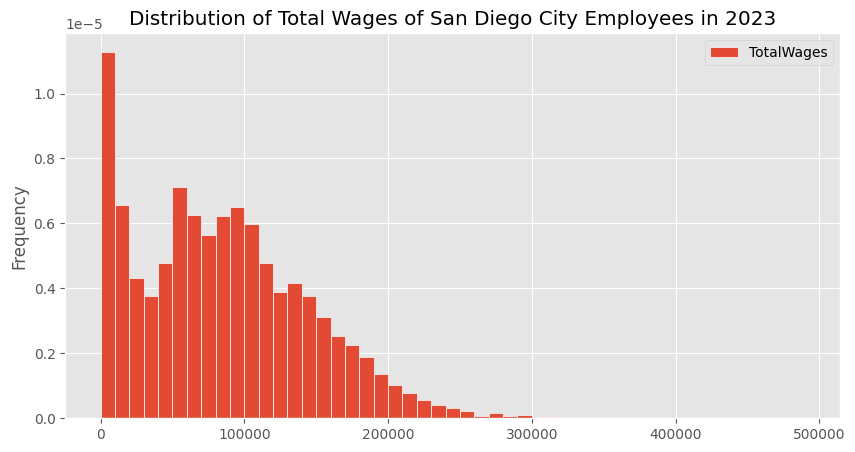

In [23]:
population.plot(kind='hist', bins=np.arange(0, 500000, 10000), density=True, ec='w', figsize=(10, 5),
                title='Distribution of Total Wages of San Diego City Employees in 2023');

### The median salary

- We can use `.median()` to find the median salary of all city employees. 
- This is a **population parameter**.
- This is **not** a random quantity.

In [24]:
population_median = population.get('TotalWages').median()
population_median

80492.0

### Let's be realistic...

- In practice, it is costly and time-consuming to survey **all** the employees.
    - More generally, we can't expect to survey all members of the population we care about.
    - We happen to have the population here, but generally we won't.
    - Instead, we gather salaries for a random sample of, say, 500 people.

### Quick terminology recap:
- The full DataFrame of salaries is the **population**.
- We observe a **sample** of 500 salaries from the population.
- We want to determine the **population median (a parameter)**, but we don't have the whole population, so instead we use the **sample median (a statistic) as an estimate**.
- Hopefully the sample median is close to the population median.

### The sample median

Let's survey 500 employees at random. To do so, we can use the `.sample` method.

In [25]:
np.random.seed(38) # Magic to ensure that we get the same results every time this code is run.

# Take a sample of size 500.
my_sample = population.sample(500)
my_sample

,TotalWages
4091,113944
2363,144835
3047,132502
...,...
4338,110628
9238,53840
4798,104600


We won't reassign `my_sample` at any point in this notebook, so it will always refer to this particular sample.

In [26]:
# Compute the sample median.
sample_median = my_sample.get('TotalWages').median()
sample_median

82508.0

### How confident are we that this is a good estimate?
- Our estimate depended on a random sample. If our sample was different, our estimate may have been different, too.
- **How different could our estimate have been?** Our confidence in the estimate depends on the answer to this question.
- The sample median is a random number. It comes from some distribution, which we don't know. 
- If we ***did*** know what the distribution of the sample median looked like, it would help us determine how different our estimate might have been, if we'd drawn a different sample.
    - "Narrow" distribution $\Rightarrow$ not too different.
    - "Wide" distribution $\Rightarrow$ quite different.

### An impractical approach

- One idea: repeatedly collect random samples of 500 **from the population** and compute their medians.
    - This is what we did previously, to compute an empirical distribution of the sample mean of flight delays.

In [27]:
sample_medians = np.array([])
for i in np.arange(1000):
    median = population.sample(500).get('TotalWages').median()
    sample_medians = np.append(sample_medians, median)
sample_medians

array([82603.5, 84498. , 77594.5, ..., 83471.5, 84897.5, 75602. ])

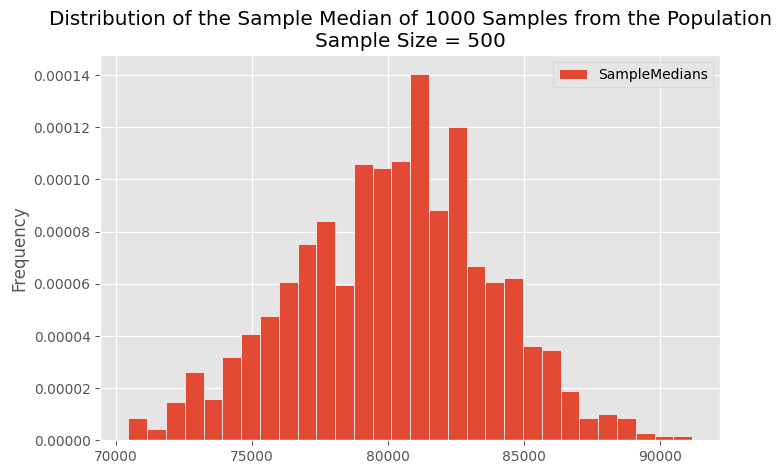

In [28]:
(bpd.DataFrame()
 .assign(SampleMedians=sample_medians)
 .plot(kind='hist', density=True,
       bins=30, ec='w', figsize=(8, 5),
       title='Distribution of the Sample Median of 1000 Samples from the Population\nSample Size = 500')
);

- This shows an empirical distribution of the sample median. It is an approximation of the true probability distribution of the sample median, based on 1000 samples.

### Problem: Drawing new samples like this is impractical – we usually can't just ask for new samples from the population.
- If we were able to do this, why not just collect more data in the first place?

- **Key insight**: our original sample, `my_sample`, looks a lot like the population.
    - Their distributions are similar.

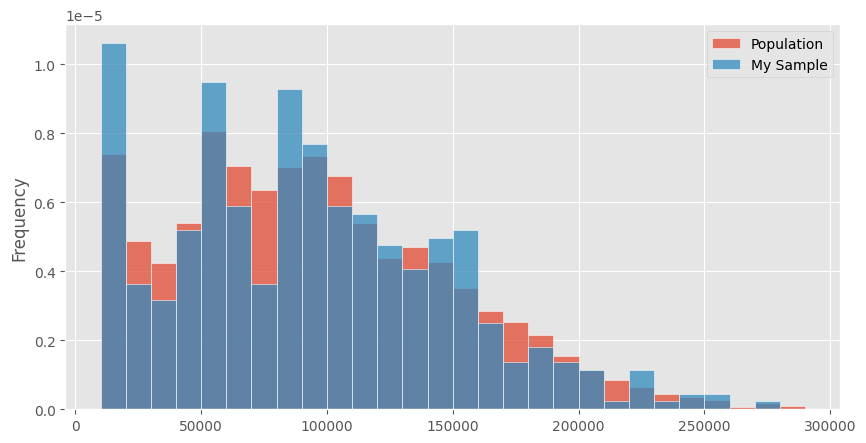

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
bins=np.arange(10_000, 300_000, 10_000)
population.plot(kind='hist', y='TotalWages', ax=ax, density=True, alpha=.75, bins=bins, ec='w', legend=False)
my_sample.plot(kind='hist', y='TotalWages', ax=ax, density=True, alpha=.75, bins=bins, ec='w', legend=False)
ax.legend(['Population', 'My Sample']);

Note that unlike the previous histogram we saw, this is depicting the distribution of the population and of one particular sample (`my_sample`), **not** the distribution of sample medians for 1000 samples.

## Bootstrapping 🥾

- **Shortcut**: Use the sample in lieu of the population.
    - The sample itself looks like the population.
    - So, resampling from the sample is kind of like sampling from the population.
    - The act of resampling from a sample is called **bootstrapping**.

- In our case specifically:
    - We have a sample of 500 salaries.
    - We want another sample of 500 salaries, but we can't draw from the population.
    - However, the original sample looks like the population.
    - So, let's just **resample from the sample!**

In [30]:
show_bootstrapping_slides()

### To replace or not replace?

- Our goal when bootstrapping is to create a sample of the same size as our original sample.

- Let's repeatedly resample 3 numbers **without replacement** from an original sample of [7, 9, 4].

In [31]:
original = [7, 9, 4]
for i in np.arange(10):
    resample = np.random.choice(original, 3, replace=False)
    print("Resample: ", resample, "    Median: ", np.median(resample))

Resample:  [9 4 7]     Median:  7.0
Resample:  [7 4 9]     Median:  7.0
Resample:  [4 7 9]     Median:  7.0
Resample:  [4 9 7]     Median:  7.0
Resample:  [7 4 9]     Median:  7.0
Resample:  [9 7 4]     Median:  7.0
Resample:  [4 7 9]     Median:  7.0
Resample:  [7 9 4]     Median:  7.0
Resample:  [9 4 7]     Median:  7.0
Resample:  [4 9 7]     Median:  7.0


- Let's repeatedly resample 3 numbers **with replacement** from an original sample of [7, 9, 4].

In [32]:
original = [7, 9, 4]
for i in np.arange(10):
    resample = np.random.choice(original, 3, replace=True)
    print("Resample: ", resample, "    Median: ", np.median(resample))

Resample:  [7 4 7]     Median:  7.0
Resample:  [9 4 9]     Median:  9.0
Resample:  [9 9 9]     Median:  9.0
Resample:  [9 4 9]     Median:  9.0
Resample:  [4 4 9]     Median:  4.0
Resample:  [9 9 7]     Median:  9.0
Resample:  [4 7 4]     Median:  4.0
Resample:  [9 4 7]     Median:  7.0
Resample:  [4 9 4]     Median:  4.0
Resample:  [7 4 4]     Median:  4.0


- When we resample without replacement, resamples look just like the original samples.

- When we resample with replacement, resamples can have a different mean, median, max, and min than the original sample.

- So, we need to sample **with replacement** to ensure that our resamples can be different from the original sample.

### Bootstrapping the sample of salaries

We can simulate the act of collecting new samples by **sampling with replacement from our original sample, `my_sample`**.

In [33]:
# Note that the population DataFrame, population, doesn't appear anywhere here.
# This is all based on one sample, my_sample.

np.random.seed(38) # Magic to ensure that we get the same results every time this code is run.

n_resamples = 5000
boot_medians = np.array([])

for i in range(n_resamples):
    
    # Resample from my_sample WITH REPLACEMENT.
    resample = my_sample.sample(500, replace=True)
    
    # Compute the median.
    median = resample.get('TotalWages').median()
    
    # Store it in our array of medians.
    boot_medians = np.append(boot_medians, median)

In [34]:
boot_medians

array([85751. , 76009. , 83106. , ..., 82760. , 83470.5, 82711. ])

### Bootstrap distribution of the sample median

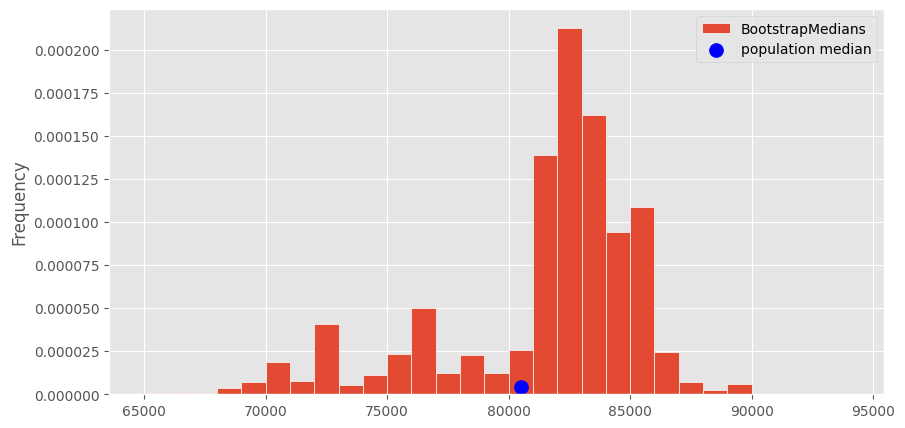

In [35]:
bpd.DataFrame().assign(BootstrapMedians=boot_medians).plot(kind='hist', density=True, bins=np.arange(65000, 95000, 1000), ec='w', figsize=(10, 5))
plt.scatter(population_median, 0.000004, color='blue', s=100, label='population median').set_zorder(2)
plt.legend();

The population median (<span style="color:blue"><b>blue dot</b></span>) is near the middle.

**In reality, we'd never get to see this!**

### What's the point of bootstrapping?

We have a sample median wage:

In [36]:
my_sample.get('TotalWages').median()

82508.0

With it, we can say that the population median wage is approximately \\$82,508, and not much else.

But by bootstrapping our one sample, we can generate an empirical distribution of the sample median:

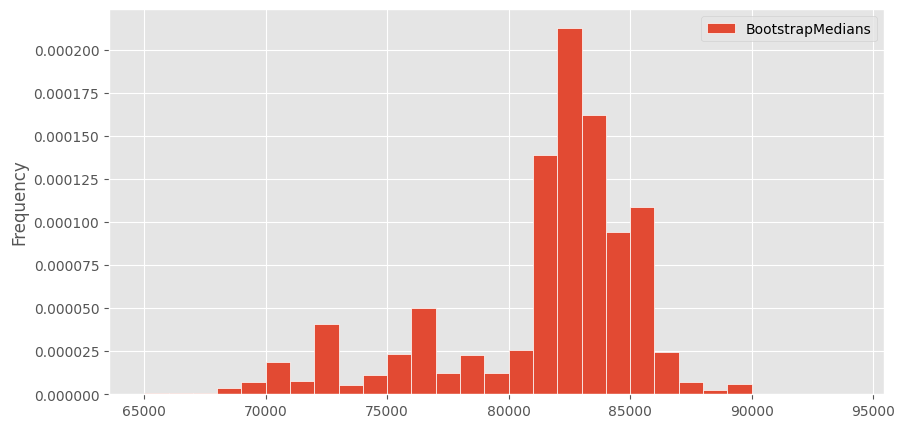

In [37]:
(bpd.DataFrame()
 .assign(BootstrapMedians=boot_medians)
 .plot(kind='hist', density=True, bins=np.arange(65000, 95000, 1000), ec='w', figsize=(10, 5))
)
plt.legend();

which allows us to say things like

> We think the population median wage is between \\$70,000 and \\$88,000.

**Next time**: We could also say that we think the population median wage is between \\$80,000 and \\$85,000. What range should we pick?